<a href="https://colab.research.google.com/github/Temmytope-seun/Text_classification/blob/main/__Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade --force-reinstall numpy
!pip install --upgrade --force-reinstall pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 101.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.4 MB/s eta 0:00:00
  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 125.7 MB/s eta 0:00:00
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2

In [ ]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

from keras.callbacks import EarlyStopping

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Version:  2.15.0
Eager mode:  True
Hub version:  0.16.1
GPU is NOT AVAILABLE


In [ ]:
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (confusion_matrix, accuracy_score, roc_auc_score,
                             precision_score, recall_score, f1_score,
                             cohen_kappa_score, matthews_corrcoef, classification_report)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

In [ ]:
# Read the dataset from my Github repository

url='https://raw.githubusercontent.com/Temmytope-seun/Text_classification/main/combined_df.csv'
data = pd.read_csv(url, engine='python')



In [ ]:
# Get shape

data.shape

(20000, 2)

In [ ]:
data.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
data['label'].value_counts()

,count
label,
1,6761
0,5797
3,2709
4,2373
2,1641
5,719


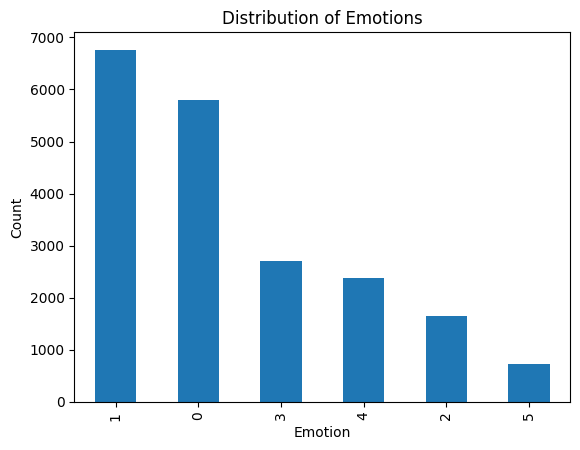

In [ ]:
# show data['label'] distriution in a bar graph

import matplotlib.pyplot as plt
# Create a bar graph of the emotion distribution
data['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()


In [ ]:
data.tail()

,text,label
19995,i just keep feeling like someone is being unki...,3
19996,im feeling a little cranky negative after this...,3
19997,i feel that i am useful to my people and that ...,1
19998,im feeling more comfortable with derby i feel ...,1
19999,i feel all weird when i have to meet w people ...,4


In [ ]:
# Check if there is any missing data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20000 non-null  object
 1   label   20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


# **Text preprocesssing**

In [ ]:
#Import neccessary libraries for text preprocessing

import re
from string import punctuation

In [ ]:
!pip install contractions
import contractions

In [ ]:
#Create a function for preprocessing

def clean_text(text):
    # make text lowercase
    text = str(text).lower()
    text = re.sub(r"[’‘']", "", text)
    # expand contractions
    text = " ".join([contractions.fix(expanded_word) for expanded_word in text.split()])
    # remove text in square brackets
    text = re.sub('\[.*?\]', '', text)
    # remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    # remove punctuation
    text = re.sub('[%s]' % re.escape(punctuation), '', text)
    text = re.sub(r"[’']", "", text)
    # remove new lines
    text = re.sub('\n', '', text)
    # remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)
    # remove apostrophes
    text = re.sub("''", '', text)
    return text

In [ ]:
# apply function on each text in the dataset

data['clean_text'] = data['text'].apply(lambda x: clean_text(x))
data.head(10)

,text,label,clean_text
0,i didnt feel humiliated,0,i did not feel humiliated
1,i can go from feeling so hopeless to so damned...,0,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,3,i am grabbing a minute to post i feel greedy w...
3,i am ever feeling nostalgic about the fireplac...,2,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,3,i am feeling grouchy
5,ive been feeling a little burdened lately wasn...,0,i have been feeling a little burdened lately w...
6,ive been taking or milligrams or times recomme...,5,i have been taking or milligrams or times reco...
7,i feel as confused about life as a teenager or...,4,i feel as confused about life as a teenager or...
8,i have been with petronas for years i feel tha...,1,i have been with petronas for years i feel tha...
9,i feel romantic too,2,i feel romantic too


## Tokenization

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize

data['text_tokens'] = data['clean_text'].apply(lambda x:word_tokenize(str(x)))
data.head(10)

,text,label,clean_text,text_tokens
0,i didnt feel humiliated,0,i did not feel humiliated,"[i, did, not, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,0,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ..."
2,im grabbing a minute to post i feel greedy wrong,3,i am grabbing a minute to post i feel greedy w...,"[i, am, grabbing, a, minute, to, post, i, feel..."
3,i am ever feeling nostalgic about the fireplac...,2,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ..."
4,i am feeling grouchy,3,i am feeling grouchy,"[i, am, feeling, grouchy]"
5,ive been feeling a little burdened lately wasn...,0,i have been feeling a little burdened lately w...,"[i, have, been, feeling, a, little, burdened, ..."
6,ive been taking or milligrams or times recomme...,5,i have been taking or milligrams or times reco...,"[i, have, been, taking, or, milligrams, or, ti..."
7,i feel as confused about life as a teenager or...,4,i feel as confused about life as a teenager or...,"[i, feel, as, confused, about, life, as, a, te..."
8,i have been with petronas for years i feel tha...,1,i have been with petronas for years i feel tha...,"[i, have, been, with, petronas, for, years, i,..."
9,i feel romantic too,2,i feel romantic too,"[i, feel, romantic, too]"


## Stop words removal

In [ ]:
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# define stopword removal function
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're',"in", "'",'used','using','one','two','also','use','us','may','ai','ad'])

def remove_stopword(word_list):
    return ' '.join([word for word in word_list if word not in stop_words])

data['text_tokens_excl_sw'] = data['text_tokens'].apply(remove_stopword)

In [ ]:
data.head(10)

,text,label,clean_text,text_tokens,text_tokens_excl_sw
0,i didnt feel humiliated,0,i did not feel humiliated,"[i, did, not, feel, humiliated]",feel humiliated
1,i can go from feeling so hopeless to so damned...,0,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ...",go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,3,i am grabbing a minute to post i feel greedy w...,"[i, am, grabbing, a, minute, to, post, i, feel...",grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,2,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ...",ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,3,i am feeling grouchy,"[i, am, feeling, grouchy]",feeling grouchy
5,ive been feeling a little burdened lately wasn...,0,i have been feeling a little burdened lately w...,"[i, have, been, feeling, a, little, burdened, ...",feeling little burdened lately sure
6,ive been taking or milligrams or times recomme...,5,i have been taking or milligrams or times reco...,"[i, have, been, taking, or, milligrams, or, ti...",taking milligrams times recommended amount fal...
7,i feel as confused about life as a teenager or...,4,i feel as confused about life as a teenager or...,"[i, feel, as, confused, about, life, as, a, te...",feel confused life teenager jaded year old man
8,i have been with petronas for years i feel tha...,1,i have been with petronas for years i feel tha...,"[i, have, been, with, petronas, for, years, i,...",petronas years feel petronas performed well ma...
9,i feel romantic too,2,i feel romantic too,"[i, feel, romantic, too]",feel romantic


In [ ]:
# prompt: get unique Emotions

unique_emotion = data['label'].unique()
unique_emotion
# sadness (0), joy (1), love (2), anger (3), fear (4), surprise (5)

array([0, 3, 2, 5, 4, 1])

In [ ]:
# Create a list for each Subject

Anger = data[data['label']== 3]['text_tokens_excl_sw']
Love = data[data['label']== 2]['text_tokens_excl_sw']
Fear = data[data['label']== 4]['text_tokens_excl_sw']
Joy = data[data['label']== 1]['text_tokens_excl_sw']
Surprise = data[data['label']== 5]['text_tokens_excl_sw']
Sadness = data[data['label']== 0]['text_tokens_excl_sw']

Anger.head()

,text_tokens_excl_sw
2,grabbing minute post feel greedy wrong
4,feeling grouchy
12,think easiest time year feel dissatisfied
20,feel irritated rejected without anyone anythin...
24,already feel like fucked though usually eat mo...


In [ ]:
def word_cloud(data, title, background_color="black", max_words = 50, cotour_width=3, contour_color='steelblue', width=200, height=100):
  long_string = ','.join(str(l) for l in data)

  wordcloud = WordCloud(background_color=background_color,
                        max_words=max_words,
                        contour_width=cotour_width,
                        contour_color=contour_color,
                        width=width,
                        height=height,
                        scale=2,
                        collocations=False)
  wordcloud.generate(long_string)

  plt.figure(figsize=(10, 7))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(title)
  plt.axis('off')
  plt.show()

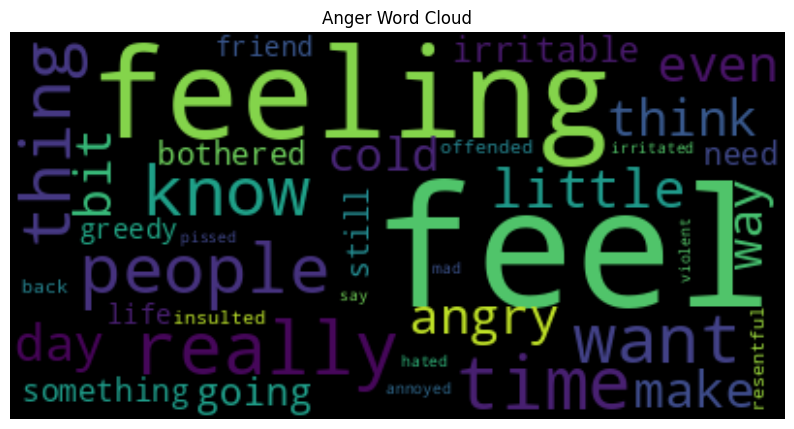

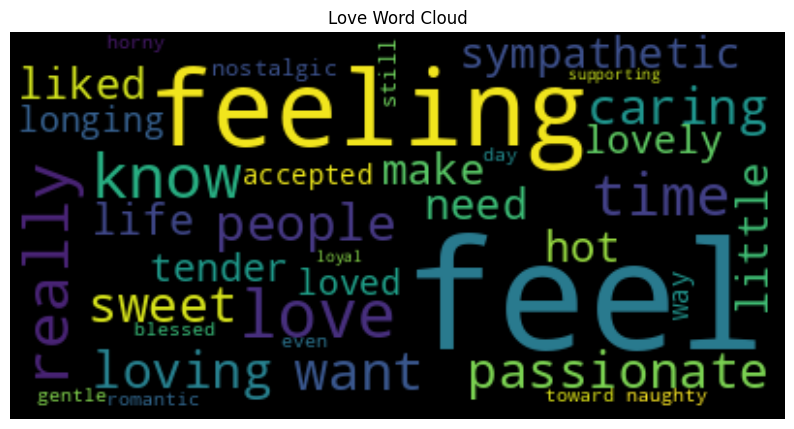

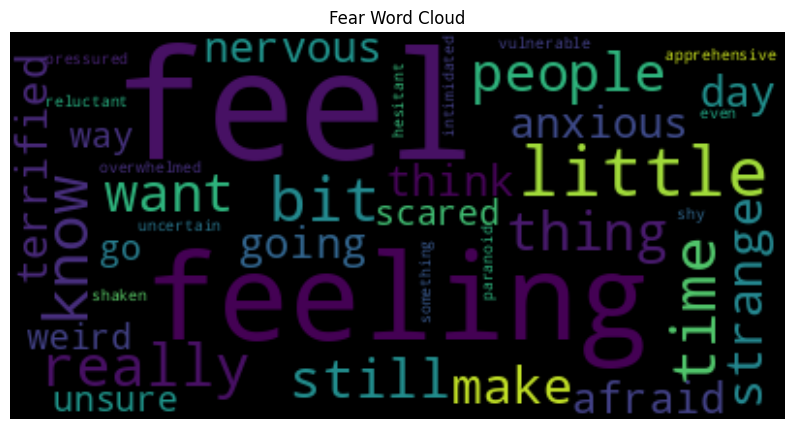

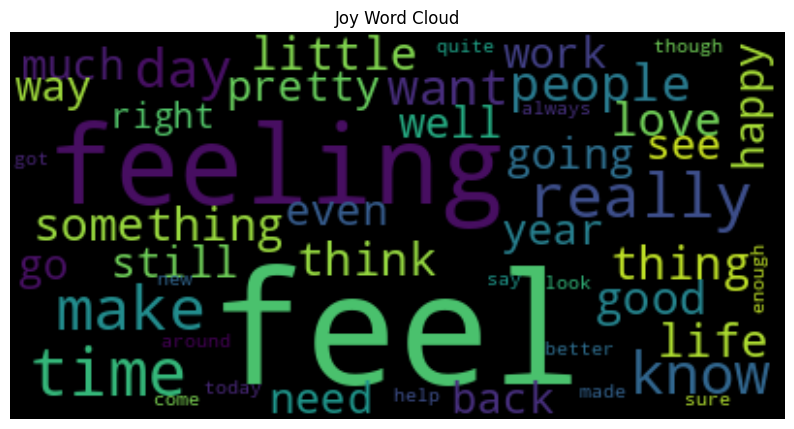

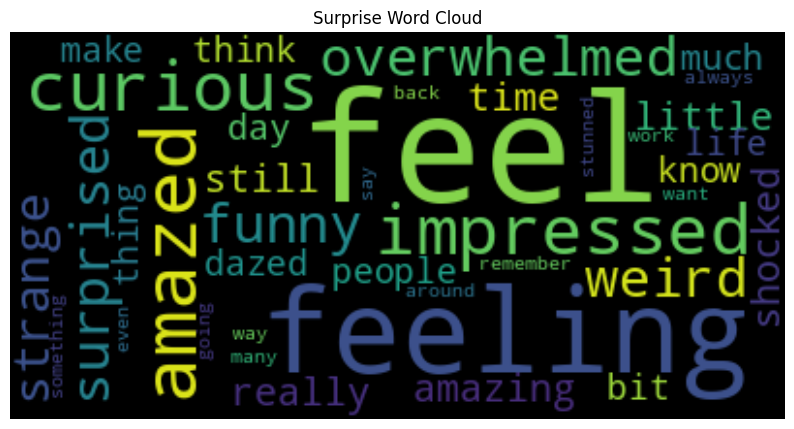

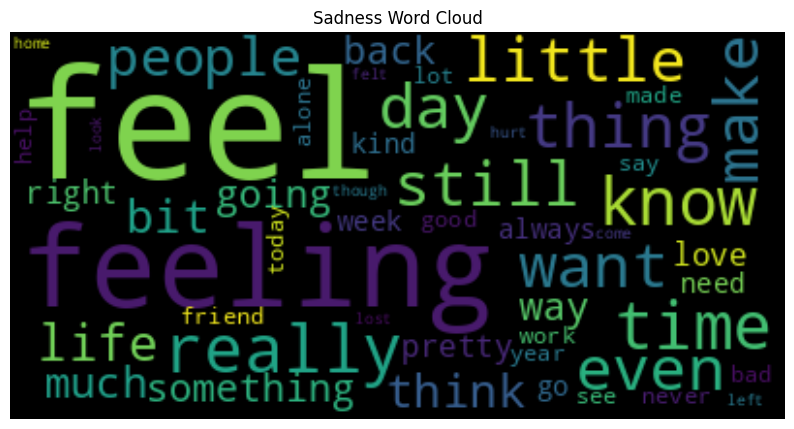

In [ ]:
# Visualize wordcloud

word_cloud(Anger, "Anger Word Cloud")
word_cloud(Love, "Love Word Cloud")
word_cloud(Fear, "Fear Word Cloud")
word_cloud(Joy, "Joy Word Cloud")
word_cloud(Surprise, "Surprise Word Cloud")
word_cloud(Sadness, "Sadness Word Cloud")

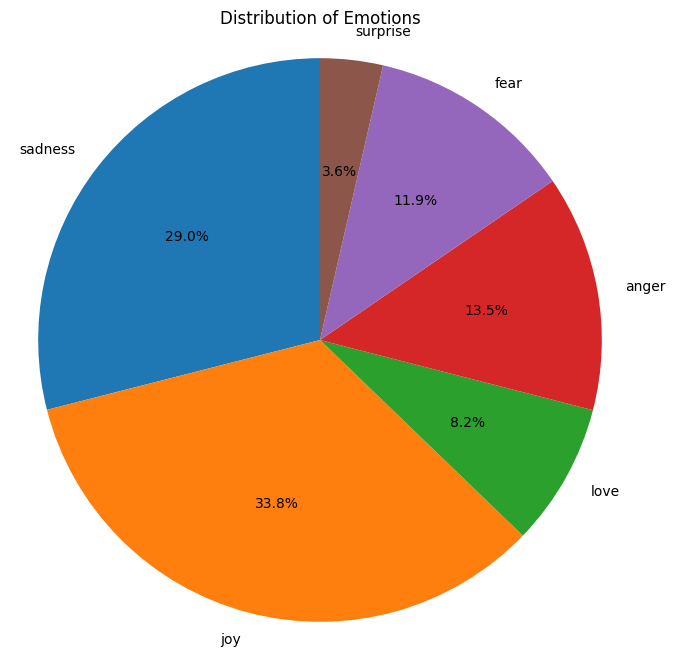

In [ ]:
# prompt: plot the distriution of emotions on a pie chart using this as label:# sadness (0), joy (1), love (2), anger (3), fear (4), surprise (5)

import matplotlib.pyplot as plt

# Emotion labels and their corresponding counts
emotion_labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
emotion_counts = data['label'].value_counts().sort_index()  # Ensure correct order

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Emotions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Text(0.5, 9.444444444444438, 'The number of words')

<Figure size 800x1000 with 0 Axes>

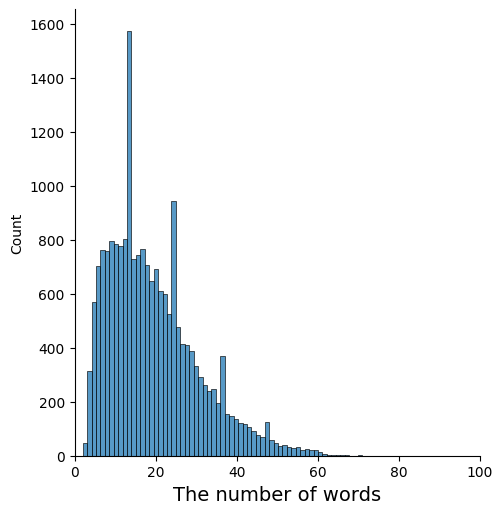

In [ ]:
# Number of words per sentence

count_sent_word = [len(sentence) for sentence in data['text_tokens']]

plt.figure(figsize=(8, 10))

sns.displot(count_sent_word)

plt.xlim(0, 100)

plt.xlabel("The number of words", fontsize=14)

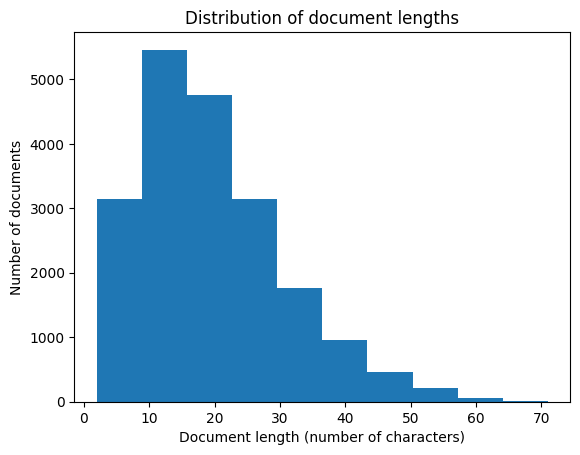

In [ ]:
#length of text document

document_lengths = [len(doc) for doc in data['text_tokens']]

# Plot a histogram of document lengths
plt.hist(document_lengths)
plt.xlabel("Document length (number of characters)")
plt.ylabel("Number of documents")
plt.title("Distribution of document lengths")
plt.show()

# **Train and Test Split**

In [ ]:
Emotions = data.text_tokens_excl_sw


print(Emotions)

0                                          feel humiliated
1        go feeling hopeless damned hopeful around some...
2                   grabbing minute post feel greedy wrong
3        ever feeling nostalgic fireplace know still pr...
4                                          feeling grouchy
                               ...                        
19995    keep feeling like someone unkind wrong think g...
19996    feeling little cranky negative doctors appoint...
19997    feel useful people gives great feeling achieve...
19998     feeling comfortable derby feel though start step
19999    feel weird meet w people text like talk face f...
Name: text_tokens_excl_sw, Length: 20000, dtype: object


In [ ]:
#Data splitting
# 20% of the data will be reserved for testing and 10% for validation

X_train, X_temp, y_train, y_temp = train_test_split(Emotions, data['label'], test_size=0.3, random_state=40)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

In [ ]:
X_train[:3]

,text_tokens_excl_sw
10247,feel god damn selfish continuing hurt time
19421,feel little scared new lot learn sure everythi...
8016,go full depth review say feel superior version


In [ ]:
X_temp[:3]

,text_tokens_excl_sw
12877,received wt txl sage bought feel terrific pric...
17256,allow mormonism crazy feel like krakauer almos...
17979,guess trying internalize serenity prayer witho...


In [ ]:
X_train,X_test,y_train,y_temp

(10247           feel god damn selfish continuing hurt time
 19421    feel little scared new lot learn sure everythi...
 8016        go full depth review say feel superior version
 798                                 say feel like tortured
 10717           feel thankful experienced company embarked
                                ...                        
 11532        planning get hammered warned feeling virtuous
 16065    feel unfortunate nearly readers going meet man...
 14501    tired heavy time familiar feeling though pleasant
 14555    ask wife annulment case feels irritated kept t...
 11590            jumped sauntered spa area feeling pleased
 Name: text_tokens_excl_sw, Length: 14000, dtype: object,
 9625     feel like someone judged harshly accepted aske...
 10475                            kind feel like supporting
 11726    deprive everything nice end cracking feeling t...
 5631                   feel incredibly loved know baby cap
 1704             landed reagan airport fe

In [ ]:
#Convert train, train, validation set into numpy array for model training

X_train_nnlm = np.array(X_train)
X_val_nnlm = np.array(X_val)
X_test_nnlm = np.array(X_test)

# **Biuld Model**

In [ ]:
num_classes = len(unique_emotion)

# Model 1 is nnlm-en-dim50

In [ ]:
pip install tensorflow==2.15.0 tensorflow-hub keras==2.15.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 115.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wra

In [ ]:
# model 1 is nnlm-en-dim50

model_1 = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model_1, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(X_train_nnlm)

<tf.Tensor: shape=(14000, 50), dtype=float32, numpy=
array([[ 3.0673391e-01, -1.3399601e-01, -7.7699292e-03, ...,
         2.7125669e-01,  6.8752177e-02, -1.8971190e-01],
       [ 2.8642842e-01, -6.4675547e-02, -2.6461899e-02, ...,
        -1.8951888e-01,  3.7239426e-01,  9.2752546e-02],
       [ 2.7512937e-04, -8.8289112e-02,  1.6676871e-01, ...,
        -3.4538725e-01,  2.3403683e-01,  2.8327554e-01],
       ...,
       [ 4.8257959e-01, -5.5447713e-02, -2.3677656e-01, ...,
        -2.6434330e-02,  2.0412999e-01, -2.0729534e-01],
       [ 3.4892760e-02,  5.0644320e-02, -4.2091036e-01, ...,
         4.0719073e-02,  1.4539644e-01, -3.5842046e-01],
       [-2.8451743e-02, -1.9519620e-02, -5.4373465e-02, ...,
         1.1131092e-02,  4.6249576e-02, -1.9078325e-01]], dtype=float32)>

In [ ]:
# Define model architecture

model_1 = tf.keras.Sequential()
model_1.add(hub_layer)
model_1.add(tf.keras.layers.Dense(16, activation='relu'))
model_1.add(tf.keras.layers.Dense(num_classes))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 16)                816       
                                                                 
 dense_1 (Dense)             (None, 6)                 102       
                                                                 
Total params: 48191518 (183.84 MB)
Trainable params: 48191518 (183.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compile the model
model_1.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#Train the model for 20 epochs and batch size of 256
history_1 = model_1.fit(X_train_nnlm,
                    y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(X_val_nnlm, y_val),
                    verbose=1)


#For evaluation and performance metrics, convert numpy back to base form
X_test = X_test_nnlm
y_test = y_test

Epoch 1/20
55/55 [==============================] - 64s 1s/step - loss: 1.7432 - accuracy: 0.2779 - val_loss: 1.5987 - val_accuracy: 0.4692
Epoch 2/20
55/55 [==============================] - 60s 1s/step - loss: 1.4487 - accuracy: 0.5284 - val_loss: 1.3362 - val_accuracy: 0.5702
Epoch 3/20
55/55 [==============================] - 60s 1s/step - loss: 1.1304 - accuracy: 0.6394 - val_loss: 1.0488 - val_accuracy: 0.6591
Epoch 4/20
55/55 [==============================] - 59s 1s/step - loss: 0.7895 - accuracy: 0.7605 - val_loss: 0.8030 - val_accuracy: 0.7495
Epoch 5/20
55/55 [==============================] - 59s 1s/step - loss: 0.5233 - accuracy: 0.8639 - val_loss: 0.6315 - val_accuracy: 0.8121
Epoch 6/20
55/55 [==============================] - 60s 1s/step - loss: 0.3373 - accuracy: 0.9286 - val_loss: 0.5188 - val_accuracy: 0.8470
Epoch 7/20
55/55 [==============================] - 60s 1s/step - loss: 0.2177 - accuracy: 0.9574 - val_loss: 0.4532 - val_accuracy: 0.8601
Epoch 8/20
55/55 [==

## **Evaluate Model 1**

In [ ]:
#result from model_1

results_1 = model_1.evaluate(X_test, y_test)

print(results_1)

126/126 [==============================] - 18s 142ms/step - loss: 0.4407 - accuracy: 0.8602
[0.4407014846801758, 0.8601990342140198]


In [ ]:
history_dict1 = history_1.history
history_dict1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

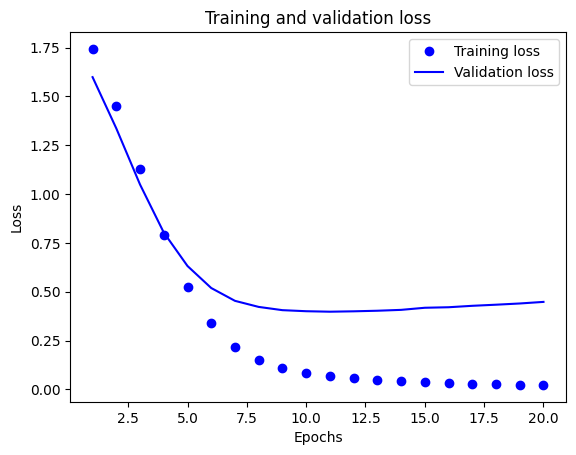

In [ ]:
acc_1 = history_dict1['accuracy']
val_acc_1 = history_dict1['val_accuracy']
loss_1 = history_dict1['loss']
val_loss_1 = history_dict1['val_loss']

epochs_1 = range(1, len(acc_1) + 1)

# "bo" is for "blue dot"
plt.plot(epochs_1, loss_1, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_1, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

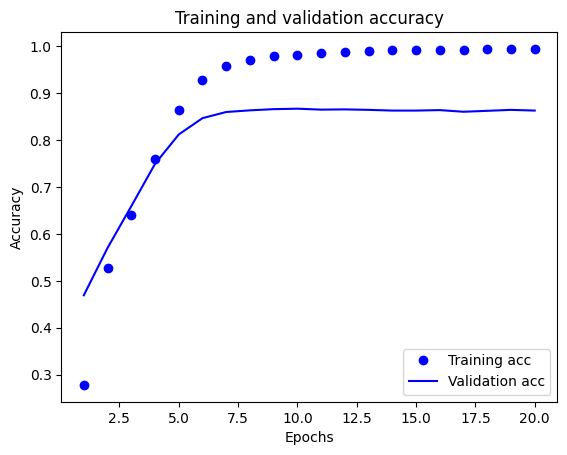

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs_1, acc_1, 'bo', label='Training acc')
plt.plot(epochs_1, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# print the classification report

import numpy as np
y_pred = model_1.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))

126/126 [==============================] - 18s 145ms/step
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1177
           1       0.87      0.91      0.89      1388
           2       0.80      0.75      0.77       339
           3       0.86      0.84      0.85       520
           4       0.82      0.78      0.80       440
           5       0.76      0.63      0.69       156

    accuracy                           0.86      4020
   macro avg       0.83      0.80      0.82      4020
weighted avg       0.86      0.86      0.86      4020



126/126 [==============================] - 18s 145ms/step


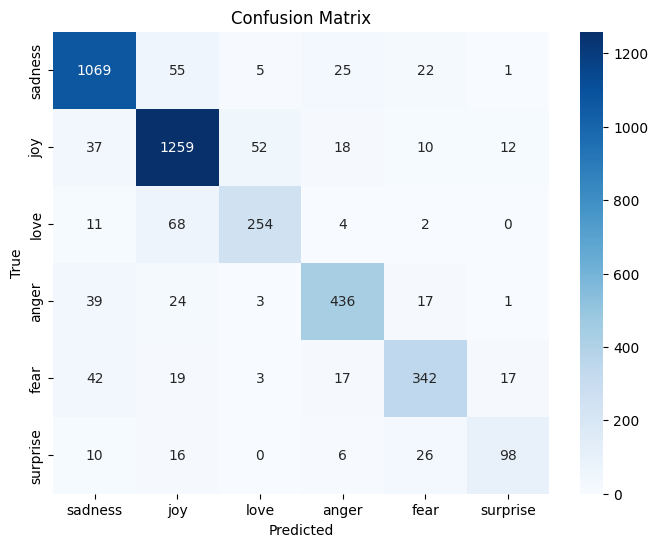

In [ ]:
# plot the confusion matrix

# Assuming y_test contains true labels and you have predictions from your model
y_pred = model_1.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


cm = confusion_matrix(y_test, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
            yticklabels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Model 2 is nnlm-en-dim50-with-normalization

In [ ]:
# model 2 is nnlm-en-dim50-with-normalization

model_2 = "https://tfhub.dev/google/nnlm-en-dim50-with-normalization/2"
hub_layer = hub.KerasLayer(model_2, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(X_train_nnlm)

<tf.Tensor: shape=(14000, 50), dtype=float32, numpy=
array([[ 3.0673391e-01, -1.3399601e-01, -7.7699292e-03, ...,
         2.7125669e-01,  6.8752177e-02, -1.8971190e-01],
       [ 2.8642842e-01, -6.4675547e-02, -2.6461899e-02, ...,
        -1.8951888e-01,  3.7239426e-01,  9.2752546e-02],
       [ 2.7512937e-04, -8.8289112e-02,  1.6676871e-01, ...,
        -3.4538725e-01,  2.3403683e-01,  2.8327554e-01],
       ...,
       [ 4.8257959e-01, -5.5447713e-02, -2.3677656e-01, ...,
        -2.6434330e-02,  2.0412999e-01, -2.0729534e-01],
       [ 3.4892760e-02,  5.0644320e-02, -4.2091036e-01, ...,
         4.0719073e-02,  1.4539644e-01, -3.5842046e-01],
       [-2.8451743e-02, -1.9519620e-02, -5.4373465e-02, ...,
         1.1131092e-02,  4.6249576e-02, -1.9078325e-01]], dtype=float32)>

In [ ]:
# Define model architecture

model_2 = tf.keras.Sequential()
model_2.add(hub_layer)
model_2.add(tf.keras.layers.Dense(64, activation='relu'))
model_2.add(tf.keras.layers.Dense(num_classes))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 50)                48190600  
                                                                 
 dense_2 (Dense)             (None, 64)                3264      
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                                 
Total params: 48194254 (183.85 MB)
Trainable params: 48194254 (183.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compile the model and specify learning rate
learning_rate = 0.01

optimizer = Adam(learning_rate = learning_rate)

model_2.compile(optimizer=optimizer,
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(X_train_nnlm,
                    y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(X_val_nnlm, y_val),
                    verbose=1)


#For evaluation and performance metrics, convert numpy back to base form
X_test = X_test_nnlm
y_test = y_test

Epoch 1/20
55/55 [==============================] - 62s 1s/step - loss: 0.9068 - accuracy: 0.6677 - val_loss: 0.4081 - val_accuracy: 0.8586
Epoch 2/20
55/55 [==============================] - 60s 1s/step - loss: 0.1545 - accuracy: 0.9472 - val_loss: 0.4245 - val_accuracy: 0.8641
Epoch 3/20
55/55 [==============================] - 60s 1s/step - loss: 0.0552 - accuracy: 0.9829 - val_loss: 0.4845 - val_accuracy: 0.8586
Epoch 4/20
55/55 [==============================] - 60s 1s/step - loss: 0.0342 - accuracy: 0.9891 - val_loss: 0.5821 - val_accuracy: 0.8490
Epoch 5/20
55/55 [==============================] - 60s 1s/step - loss: 0.0227 - accuracy: 0.9921 - val_loss: 0.5689 - val_accuracy: 0.8576
Epoch 6/20
55/55 [==============================] - 59s 1s/step - loss: 0.0184 - accuracy: 0.9939 - val_loss: 0.6068 - val_accuracy: 0.8586
Epoch 7/20
55/55 [==============================] - 59s 1s/step - loss: 0.0158 - accuracy: 0.9943 - val_loss: 0.6365 - val_accuracy: 0.8495
Epoch 8/20
55/55 [==

## **Evaluate Model 2**

In [ ]:
#result from model_2

results_2 = model_2.evaluate(X_test, y_test)

print(results_2)

126/126 [==============================] - 17s 136ms/step - loss: 0.9715 - accuracy: 0.8415
[0.9714930057525635, 0.8415423035621643]


In [ ]:
history_dict2 = history_2.history
history_dict2.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

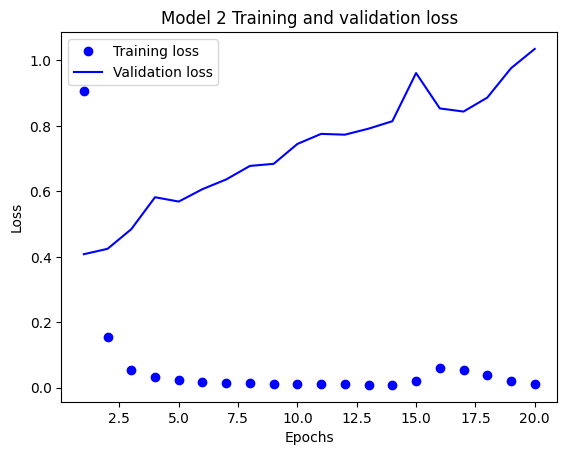

In [ ]:
acc_2 = history_dict2['accuracy']
val_acc_2 = history_dict2['val_accuracy']
loss_2 = history_dict2['loss']
val_loss_2 = history_dict2['val_loss']

epochs_2 = range(1, len(acc_2) + 1)

# "bo" is for "blue dot"
plt.plot(epochs_2, loss_2, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_2, val_loss_2, 'b', label='Validation loss')
plt.title('Model 2 Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

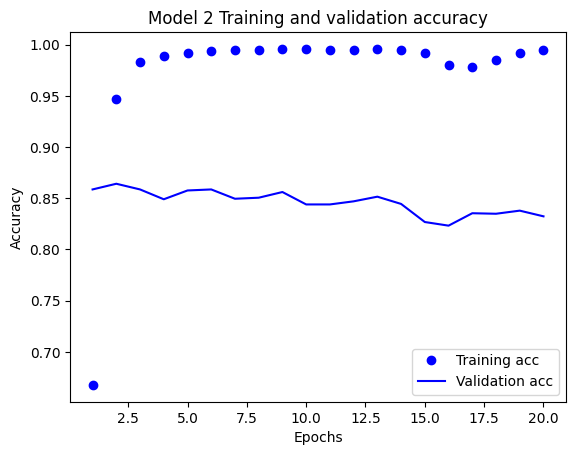

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs_2, acc_2, 'bo', label='Training acc')
plt.plot(epochs_2, val_acc_2, 'b', label='Validation acc')
plt.title('Model 2 Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# print the classification report

import numpy as np
y_pred = model_2.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))


126/126 [==============================] - 17s 134ms/step
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1177
           1       0.86      0.90      0.88      1388
           2       0.77      0.71      0.74       339
           3       0.83      0.82      0.82       520
           4       0.77      0.76      0.76       440
           5       0.76      0.63      0.69       156

    accuracy                           0.84      4020
   macro avg       0.81      0.78      0.80      4020
weighted avg       0.84      0.84      0.84      4020



126/126 [==============================] - 17s 137ms/step


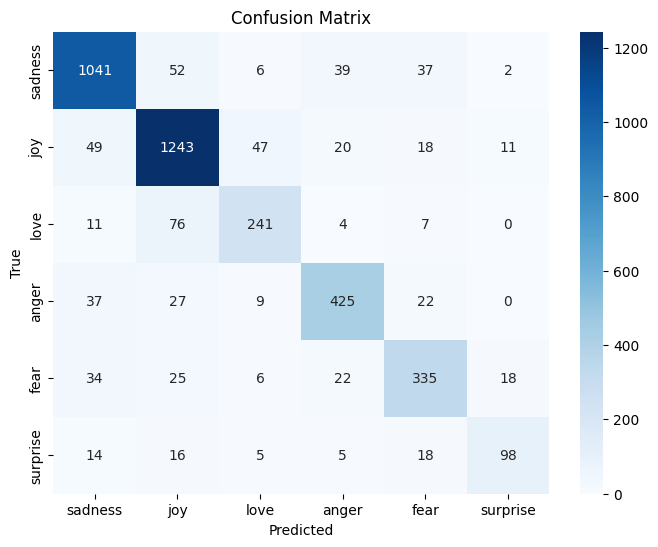

In [ ]:
# prompt: plot the confusion matrix

# Assuming y_test contains true labels and you have predictions from your model
y_pred = model_2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


cm = confusion_matrix(y_test, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
            yticklabels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Model 3 is nnlm-en-dim128-with-normalization

In [ ]:
model_3 = "https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2"
hub_layer = hub.KerasLayer(model_3, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(X_train_nnlm)

<tf.Tensor: shape=(14000, 128), dtype=float32, numpy=
array([[ 0.25908524,  0.1400548 , -0.03773874, ..., -0.10731941,
         0.14633842,  0.12888028],
       [ 0.30831304,  0.18099698,  0.06799938, ..., -0.17365298,
         0.17219713,  0.03903891],
       [ 0.24706545,  0.20731057, -0.0531529 , ..., -0.12509291,
        -0.00646158,  0.15640293],
       ...,
       [ 0.30255452, -0.05273056, -0.01145065, ..., -0.1393738 ,
         0.14627524,  0.27682585],
       [ 0.14247607,  0.39154753,  0.02182757, ..., -0.2142919 ,
         0.12446983,  0.22818413],
       [ 0.04290119,  0.07999054,  0.07542657, ..., -0.09491955,
         0.12423151,  0.06033589]], dtype=float32)>

In [ ]:
# Define model architecture

model_3 = tf.keras.Sequential()
model_3.add(hub_layer)
model_3.add(tf.keras.layers.Dense(128, activation='relu'))
model_3.add(tf.keras.layers.Dense(64, activation='relu'))
model_3.add(tf.keras.layers.Dense(num_classes, activation='sigmoid'))

model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 128)               124642688 
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 6)                 390       
                                                                 
Total params: 124667846 (475.57 MB)
Trainable params: 124667846 (475.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compile the model and specify learning rate
learning_rate = 0.01

optimizer = Adam(learning_rate = learning_rate)

model_3.compile(optimizer=optimizer,
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(X_train_nnlm,
                    y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(X_val_nnlm, y_val),
                    verbose=1)


#For evaluation and performance metrics, convert numpy back to base form
X_test = X_test_nnlm
y_test = y_test

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


55/55 [==============================] - 157s 3s/step - loss: 0.8052 - accuracy: 0.7031 - val_loss: 0.4270 - val_accuracy: 0.8556
Epoch 2/20
55/55 [==============================] - 153s 3s/step - loss: 0.1645 - accuracy: 0.9439 - val_loss: 0.4395 - val_accuracy: 0.8520
Epoch 3/20
55/55 [==============================] - 154s 3s/step - loss: 0.0621 - accuracy: 0.9793 - val_loss: 0.5935 - val_accuracy: 0.8535
Epoch 4/20
55/55 [==============================] - 155s 3s/step - loss: 0.0388 - accuracy: 0.9867 - val_loss: 0.6462 - val_accuracy: 0.8449
Epoch 5/20
55/55 [==============================] - 156s 3s/step - loss: 0.0297 - accuracy: 0.9881 - val_loss: 0.7236 - val_accuracy: 0.8429
Epoch 6/20
55/55 [==============================] - 156s 3s/step - loss: 0.0263 - accuracy: 0.9891 - val_loss: 0.9230 - val_accuracy: 0.8313
Epoch 7/20
55/55 [==============================] - 156s 3s/step - loss: 0.0309 - accuracy: 0.9885 - val_loss: 0.8435 - val_accuracy: 0.8409
Epoch 8/20
55/55 [======

## **Evaluate Model 3**

In [ ]:
#result from model_3

results_3 = model_3.evaluate(X_test, y_test)

print(results_3)

126/126 [==============================] - 44s 347ms/step - loss: 0.9854 - accuracy: 0.8276
[0.9854169487953186, 0.8276119232177734]


In [ ]:
history_dict3 = history_3.history
history_dict3.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

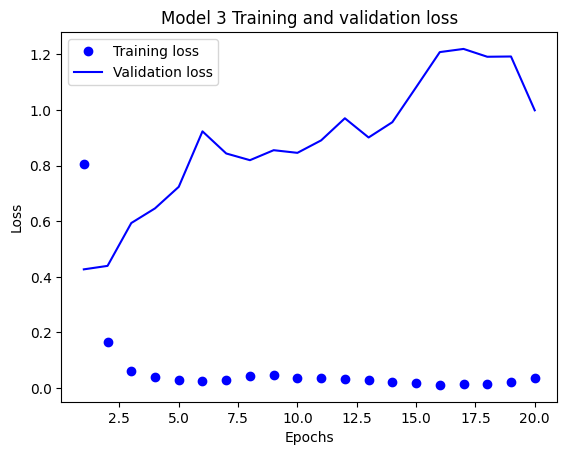

In [ ]:
acc_3 = history_dict3['accuracy']
val_acc_3 = history_dict3['val_accuracy']
loss_3 = history_dict3['loss']
val_loss_3 = history_dict3['val_loss']

epochs_3 = range(1, len(acc_3) + 1)

# "bo" is for "blue dot"
plt.plot(epochs_3, loss_3, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_3, val_loss_3, 'b', label='Validation loss')
plt.title('Model 3 Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

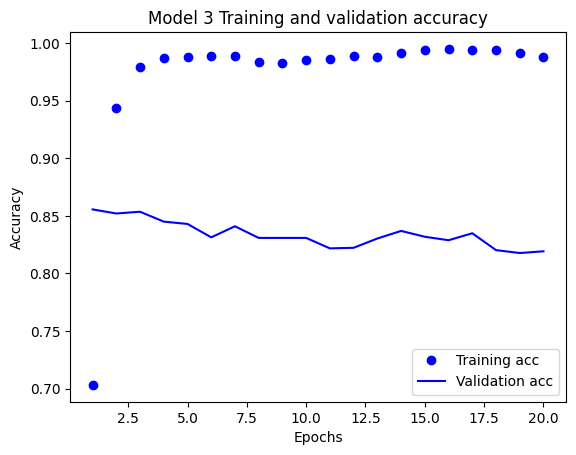

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs_3, acc_3, 'bo', label='Training acc')
plt.plot(epochs_3, val_acc_3, 'b', label='Validation acc')
plt.title('Model 3 Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# print the classification report

import numpy as np
y_pred = model_3.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))

126/126 [==============================] - 43s 343ms/step
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1177
           1       0.84      0.88      0.86      1388
           2       0.75      0.65      0.70       339
           3       0.83      0.82      0.82       520
           4       0.76      0.77      0.76       440
           5       0.74      0.64      0.69       156

    accuracy                           0.83      4020
   macro avg       0.80      0.77      0.78      4020
weighted avg       0.83      0.83      0.83      4020



126/126 [==============================] - 43s 342ms/step


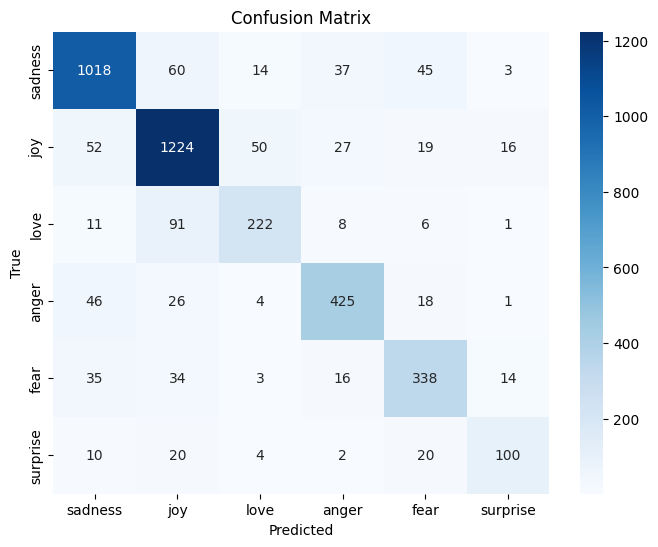

In [ ]:
# plot the confusion matrix

# Assuming y_test contains true labels and you have predictions from your model
y_pred = model_3.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


cm = confusion_matrix(y_test, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
            yticklabels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
